## TASK
find coins that doesn't behaviour like BTC

In [20]:
import pandas as pd
import numpy as np
import cryptocompare
import random
import time
import datetime
import matplotlib.pyplot as plt
import pywt
import tsfel
from sklearn import cluster, manifold, decomposition
from tsfresh import extract_features
from tslearn.clustering import TimeSeriesKMeans

## Data loading

In [2]:
coin_list = cryptocompare.get_coin_list(format=True)
coin_list.remove('BTC')
random.shuffle(coin_list)

coin_iter = iter(coin_list)

print(len(coin_list))

8525


In [3]:
quantity = 1_00
exchange = 'CCCAGG'
end_time = datetime.datetime.now().timestamp()  # i want to fix it, because while u download data, time can change

In [4]:
def get_time_and_close(x: list, time_type: str) -> dict:  # to extract desired data
    return {f"{time_type}_{item['time']}": item['close'] for item in x}

In [5]:
%%time
result_dict = {'month': {},
               'days': {},
               'hour': {}}

used_coin_list = []
curr_quantity = 0
while curr_quantity < quantity:
    try:
        coin = next(coin_iter)
        data_by_month = cryptocompare.get_historical_price_day(coin, currency='USD', limit=30, exchange=exchange, toTs=end_time)
        if data_by_month is None:
            continue

        data_by_days = cryptocompare.get_historical_price_hour(coin, currency='USD', limit=3*24, exchange=exchange, toTs=end_time)
        data_by_hour = cryptocompare.get_historical_price_minute(coin, currency='USD', limit=60, exchange=exchange, toTs=end_time)

        result_dict['month'][coin] = get_time_and_close(data_by_month, 'month')
        result_dict['days'][coin] = get_time_and_close(data_by_days, 'days')
        result_dict['hour'][coin] = get_time_and_close(data_by_hour, 'hour')

        used_coin_list.append(coin)
        curr_quantity += 1
    except TypeError:  # if it was stopped with 'You are over your rate limit please upgrade your account'
        continue
        
    
print(curr_quantity)

[ERROR] CCCAGG market does not exist for this coin pair (NEFTIPEDIA-USD)
[ERROR] CCCAGG market does not exist for this coin pair (FTR-USD)
[ERROR] CCCAGG market does not exist for this coin pair (FCF-USD)
[ERROR] CCCAGG market does not exist for this coin pair (EWTT-USD)
[ERROR] CCCAGG market does not exist for this coin pair (OMGC-USD)
[ERROR] CCCAGG market does not exist for this coin pair (VLXPAD-USD)
[ERROR] CCCAGG market does not exist for this coin pair (NIT-USD)
[ERROR] CCCAGG market does not exist for this coin pair (RPZX-USD)
[ERROR] CCCAGG market does not exist for this coin pair (ELVN-USD)
[ERROR] CCCAGG market does not exist for this coin pair (PLAYCOIN-USD)
[ERROR] CCCAGG market does not exist for this coin pair (AIBB-USD)
[ERROR] CCCAGG market does not exist for this coin pair (SAPP-USD)
[ERROR] CCCAGG market does not exist for this coin pair (DCIP-USD)
[ERROR] CCCAGG market does not exist for this coin pair (SLIM-USD)
[ERROR] CCCAGG market does not exist for this coin pa

[ERROR] CCCAGG market does not exist for this coin pair (LUNG-USD)
[ERROR] CCCAGG market does not exist for this coin pair (GAMESTARS-USD)
[ERROR] CCCAGG market does not exist for this coin pair (BAK-USD)
[ERROR] CCCAGG market does not exist for this coin pair (EURX-USD)
[ERROR] CCCAGG market does not exist for this coin pair (BCNX-USD)
[ERROR] CCCAGG market does not exist for this coin pair (EAC-USD)
[ERROR] CCCAGG market does not exist for this coin pair (PRXY-USD)
[ERROR] CCCAGG market does not exist for this coin pair (HLPT-USD)
[ERROR] CCCAGG market does not exist for this coin pair (SCOOBY-USD)
[ERROR] CCCAGG market does not exist for this coin pair (VISION-USD)
[ERROR] CCCAGG market does not exist for this coin pair (GTON-USD)
[ERROR] CCCAGG market does not exist for this coin pair (COVN-USD)
[ERROR] CCCAGG market does not exist for this coin pair (COY-USD)
[ERROR] CCCAGG market does not exist for this coin pair (CBM-USD)
[ERROR] CCCAGG market does not exist for this coin pair (

In [6]:
coin = 'BTC'
data_by_month = cryptocompare.get_historical_price_day(coin, currency='USD', limit=30, exchange=exchange, toTs=end_time)
data_by_days = cryptocompare.get_historical_price_hour(coin, currency='USD', limit=3*24, exchange=exchange, toTs=end_time)
data_by_hour = cryptocompare.get_historical_price_minute(coin, currency='USD', limit=60, exchange=exchange, toTs=end_time)

result_dict['month'][coin] = get_time_and_close(data_by_month, 'month')
result_dict['days'][coin] = get_time_and_close(data_by_days, 'days')
result_dict['hour'][coin] = get_time_and_close(data_by_hour, 'hour')

used_coin_list.append(coin)

In [7]:
columns = list(result_dict['month'][coin]) + list(result_dict['days'][coin]) + list(result_dict['hour'][coin])

df = pd.DataFrame(columns=columns, index=used_coin_list)
for coin in used_coin_list:
    df.locs[coin] = {**result_dict['month'][coin], **result_dict['days'][coin], **result_dict['hour'][coin]}
    
df

,month_1684627200,month_1684713600,month_1684800000,month_1684886400,month_1684972800,month_1685059200,month_1685145600,month_1685232000,month_1685318400,month_1685404800,...,hour_1687265040,hour_1687265100,hour_1687265160,hour_1687265220,hour_1687265280,hour_1687265340,hour_1687265400,hour_1687265460,hour_1687265520,hour_1687265580
UENC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.38
PSM,0.000268,0.000269,0.000272,0.000263,0.000265,0.000267,0.000269,0.000281,0.000278,0.000277,...,0.000268,0.000269,0.000269,0.000269,0.000269,0.000269,0.000268,0.000268,0.000268,0.000268
CFG,0.2292,0.2297,0.2246,0.2115,0.2141,0.2202,0.2215,0.2259,0.2213,0.2191,...,0.1779,0.1809,0.1779,0.1779,0.1799,0.1791,0.18,0.1787,0.1779,0.1779
BAX,0.000217,0.000218,0.000241,0.000216,0.000217,0.000219,0.00022,0.00021,0.000246,0.000247,...,0.000268,0.000269,0.000269,0.000308,0.000269,0.000269,0.000268,0.000268,0.000268,0.000311
CDN,0.005619,0.00564,0.005717,0.005529,0.005561,0.005611,0.005643,0.005896,0.005827,0.005817,...,0.005637,0.005638,0.005637,0.005637,0.00564,0.005639,0.005634,0.005636,0.005637,0.00966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GEOJ,0.001246,0.001291,0.00128,0.001242,0.00121,0.001207,0.001172,0.001165,0.001136,0.001122,...,0.000571,0.000571,0.000571,0.000571,0.000571,0.000571,0.000571,0.000571,0.000571,0.000571
EBET,0.03611,0.03636,0.03709,0.036,0.03612,0.03657,0.03662,0.03818,0.03786,0.03802,...,0.03463,0.03462,0.03461,0.03461,0.03463,0.03463,0.03461,0.03461,0.03461,0.03461
MLN,18.46,18.38,18.63,18.24,18.22,18.37,18.5,18.76,18.51,18.58,...,15.99,14.66,14.76,15.98,14.83,15.98,15.97,15.98,14.79,14.74
CRSP,0.001925,0.001925,0.001925,0.001925,0.001925,0.001925,0.001925,0.001925,0.001925,0.001925,...,0.001633,0.001633,0.001633,0.001633,0.001633,0.001633,0.001633,0.001633,0.001633,0.001633


In [9]:
df.to_csv('coin_data.xlsx')

## prepairing and analysis

In [2]:
df = pd.read_csv('coin_data.xlsx').rename(columns={'Unnamed: 0': 'coin'}).set_index('coin')
used_coin_list = list(df.index)
df

,month_1684627200,month_1684713600,month_1684800000,month_1684886400,month_1684972800,month_1685059200,month_1685145600,month_1685232000,month_1685318400,month_1685404800,...,hour_1687265040,hour_1687265100,hour_1687265160,hour_1687265220,hour_1687265280,hour_1687265340,hour_1687265400,hour_1687265460,hour_1687265520,hour_1687265580
coin,,,,,,,,,,,,,,,,,,,,,
UENC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.380000
PSM,0.000268,0.000269,0.000272,0.000263,0.000265,0.000267,0.000269,0.000281,0.000278,0.000277,...,0.000268,0.000269,0.000269,0.000269,0.000269,0.000269,0.000268,0.000268,0.000268,0.000268
CFG,0.229200,0.229700,0.224600,0.211500,0.214100,0.220200,0.221500,0.225900,0.221300,0.219100,...,0.177900,0.180900,0.177900,0.177900,0.179900,0.179100,0.180000,0.178700,0.177900,0.177900
BAX,0.000217,0.000218,0.000241,0.000216,0.000217,0.000219,0.000220,0.000210,0.000246,0.000247,...,0.000268,0.000269,0.000269,0.000308,0.000269,0.000269,0.000268,0.000268,0.000268,0.000311
CDN,0.005619,0.005640,0.005717,0.005529,0.005561,0.005611,0.005643,0.005896,0.005827,0.005817,...,0.005637,0.005638,0.005637,0.005637,0.005640,0.005639,0.005634,0.005636,0.005637,0.009660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GEOJ,0.001246,0.001291,0.001280,0.001242,0.001210,0.001207,0.001172,0.001165,0.001136,0.001122,...,0.000571,0.000571,0.000571,0.000571,0.000571,0.000571,0.000571,0.000571,0.000571,0.000571
EBET,0.036110,0.036360,0.037090,0.036000,0.036120,0.036570,0.036620,0.038180,0.037860,0.038020,...,0.034630,0.034620,0.034610,0.034610,0.034630,0.034630,0.034610,0.034610,0.034610,0.034610
MLN,18.460000,18.380000,18.630000,18.240000,18.220000,18.370000,18.500000,18.760000,18.510000,18.580000,...,15.990000,14.660000,14.760000,15.980000,14.830000,15.980000,15.970000,15.980000,14.790000,14.740000


In [3]:
# min_max_scalling
time_options = ['month', 'days', 'hour']
for time_type in time_options:
    curr_columns = [col for col in df.columns if time_type in col]
    for coin in used_coin_list:
        curr_df = df[df.index==coin][curr_columns]
        curr_max, curr_min = curr_df.max(axis=1)[coin], curr_df.min(axis=1)[coin]
        curr_df = (curr_df - curr_min) / (curr_max - curr_min)
        df.update(curr_df, join='left', overwrite=True)
df

,month_1684627200,month_1684713600,month_1684800000,month_1684886400,month_1684972800,month_1685059200,month_1685145600,month_1685232000,month_1685318400,month_1685404800,...,hour_1687265040,hour_1687265100,hour_1687265160,hour_1687265220,hour_1687265280,hour_1687265340,hour_1687265400,hour_1687265460,hour_1687265520,hour_1687265580
coin,,,,,,,,,,,,,,,,,,,,,
UENC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
PSM,0.552542,0.586441,0.708475,0.406780,0.457627,0.538983,0.589831,1.000000,0.888136,0.871186,...,0.076923,0.153846,0.153846,0.153846,0.230769,0.153846,0.000000,0.076923,0.076923,0.000000
CFG,0.990975,1.000000,0.907942,0.671480,0.718412,0.828520,0.851986,0.931408,0.848375,0.808664,...,0.020000,0.620000,0.020000,0.020000,0.420000,0.260000,0.440000,0.180000,0.020000,0.020000
BAX,0.040072,0.048445,0.186005,0.035885,0.040072,0.056220,0.058014,0.000000,0.215909,0.222488,...,0.002262,0.004525,0.004525,0.891403,0.006787,0.004525,0.000000,0.002262,0.002262,0.977376
CDN,0.078029,0.082820,0.100388,0.057495,0.064796,0.076204,0.083504,0.141227,0.125485,0.123203,...,0.000745,0.000994,0.000745,0.000745,0.001490,0.001242,0.000000,0.000497,0.000745,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GEOJ,0.937483,1.000000,0.984718,0.931926,0.887469,0.883301,0.834676,0.824951,0.784662,0.765213,...,0.927602,0.923077,0.918552,0.918552,0.932127,0.932127,0.918552,0.914027,0.918552,0.918552
EBET,0.163934,0.177155,0.215759,0.158117,0.164463,0.188260,0.190904,0.273400,0.256478,0.264939,...,0.181818,0.090909,0.000000,0.000000,0.181818,0.181818,0.000000,0.000000,0.000000,0.000000
MLN,0.926108,0.906404,0.967980,0.871921,0.866995,0.903941,0.935961,1.000000,0.938424,0.955665,...,0.992908,0.049645,0.120567,0.985816,0.170213,0.985816,0.978723,0.985816,0.141844,0.106383


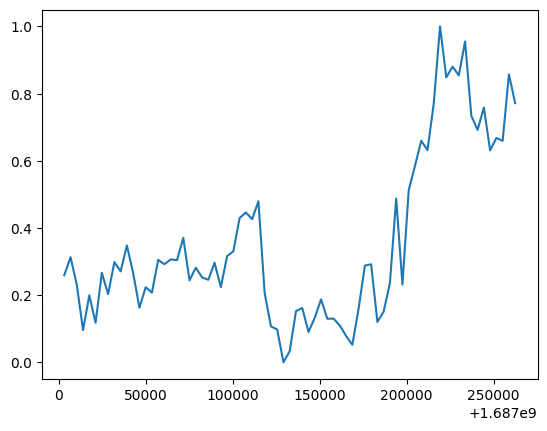

In [4]:
coin = 'BTC'
time_type = 'days'

curr_columns = [col for col in df.columns if time_type in col]
curr_df = df[df.index==coin][curr_columns].rename(columns={col: int(col.split('_')[1]) for col in curr_columns})
curr_df = curr_df.T.reset_index()

plt.plot(curr_df['index'], curr_df[coin])

## tsfresh

In [15]:
## dataframe prepairing to tsfresh
df_for_tsfresh = pd.DataFrame()
for coin in used_coin_list:
    curr_month_df = df[df.index==coin][[col for col in df.columns if 'month' in col]].T.reset_index()
    curr_days_df = df[df.index==coin][[col for col in df.columns if 'days' in col]].T.reset_index()
    curr_hour_df = df[df.index==coin][[col for col in df.columns if 'hour' in col]].T.reset_index()
    
    curr_month_df['time'] = curr_month_df['index'].apply(lambda x: int(x.split('_')[1]))
    curr_days_df['time'] = curr_days_df['index'].apply(lambda x: int(x.split('_')[1]))
    curr_hour_df['time'] = curr_hour_df['index'].apply(lambda x: int(x.split('_')[1]))
    
    curr_month_df['index'], curr_days_df['index'], curr_hour_df['index'] = coin, coin, coin
    curr_month_df = curr_month_df.rename(columns={'index': 'coin', coin: 'value'})[['coin', 'time', 'value']]. \
        sort_values(by='time')
    curr_days_df = curr_days_df.rename(columns={'index': 'coin', coin: 'value'})[['coin', 'time', 'value']]. \
        sort_values(by='time')
    curr_hour_df = curr_hour_df.rename(columns={'index': 'coin', coin: 'value'})[['coin', 'time', 'value']]. \
        sort_values(by='time')

    df_for_tsfresh = pd.concat([df_for_tsfresh, curr_month_df, curr_days_df, curr_hour_df], axis=0)
    
df_for_tsfresh = df_for_tsfresh.reset_index(drop=True)
df_for_tsfresh

coin,coin,time,value
0,UENC,1684627200,0.000000
1,UENC,1684713600,0.000000
2,UENC,1684800000,0.000000
3,UENC,1684886400,0.000000
4,UENC,1684972800,0.000000
...,...,...,...
16660,BTC,1687265340,0.185360
16661,BTC,1687265400,0.000000
16662,BTC,1687265460,0.063619
16663,BTC,1687265520,0.112158


In [16]:
extracted_features = extract_features(df_for_tsfresh, column_id="coin", column_sort='time')
extracted_features = extracted_features.fillna(0)
extracted_features

Feature Extraction: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:01<00:00, 17.16it/s]


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
AAVE,0.0,1.0,1.0,1.0,80.411627,49.337996,0.109632,-4.442463e-03,-0.000190,0.509732,...,0.355641,0.500794,2.299778,1.737199,2.992467,4.155893,4.834696,5.042748,0.0,0.930615
ARI,0.0,1.0,1.0,1.0,30.100087,18.756458,0.053627,8.316915e-04,-0.000001,0.004805,...,0.130282,0.195200,1.100623,1.640435,2.777175,3.842365,4.594582,4.928249,0.0,0.938776
ARPAC,0.0,0.0,1.0,1.0,2.072000,1.008576,0.012537,4.878049e-05,0.000000,0.008000,...,0.130282,0.130282,0.130282,0.257415,0.387085,0.517369,0.611084,0.705304,0.0,0.149714
ATLAS,0.0,1.0,1.0,1.0,68.609923,38.859846,0.118323,-3.261782e-03,-0.000194,0.392857,...,0.332634,0.631951,2.277727,1.724312,2.932735,4.025166,4.644825,4.866600,0.0,0.975169
B2X,0.0,1.0,1.0,1.0,66.879791,38.259768,0.109530,-2.900118e-03,-0.000104,0.307692,...,0.332634,0.355641,1.683298,1.732470,2.947745,4.081859,4.796768,5.007872,0.0,0.955448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XPD,0.0,1.0,1.0,1.0,2.630130,2.006509,0.024327,6.298780e-05,0.000000,0.000000,...,1.543311,2.174912,3.525318,0.132227,0.199100,0.266484,0.334382,0.402795,0.0,0.293093
XSPC,0.0,1.0,1.0,1.0,60.241734,34.960781,0.109608,-1.250614e-04,-0.000025,0.266667,...,0.355641,0.467389,1.963907,1.697954,2.856745,3.945941,4.611547,4.910811,0.0,0.988377
ZCC1,0.0,1.0,1.0,1.0,76.868372,46.216668,0.106649,-3.180056e-03,-0.000148,0.461538,...,0.481267,0.745555,2.523742,1.736411,2.981312,4.129999,4.749030,4.981716,0.0,0.991742
ZENI,0.0,1.0,1.0,1.0,2.003090,2.000000,0.024390,3.088415e-07,0.000000,0.000000,...,1.543311,2.165079,2.830561,0.132227,0.199100,0.266484,0.334382,0.402795,0.0,0.285750


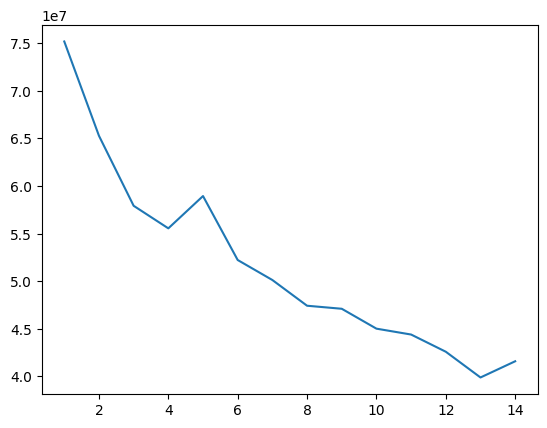

In [17]:
x, y = [], []
for i in range(1, 15):
    x.append(i)
    clusterer = cluster.KMeans(n_clusters=i, n_init='auto')
    clusterer.fit(extracted_features)
    y.append(clusterer.inertia_)
    
plt.plot(x, y)

In [18]:
clusterer = cluster.KMeans(n_clusters=12, n_init='auto')
labels = pd.Series(clusterer.fit_predict(extracted_features))
labels.index = extracted_features.index
labels

AAVE     9
ARI      1
ARPAC    6
ATLAS    6
B2X      0
        ..
XPD      8
XSPC     0
ZCC1     9
ZENI     8
ZYN      1
Length: 101, dtype: int32

In [19]:
BTC_label = labels[labels.index == 'BTC']['BTC']
coins_with_BTC = sorted(list(labels[labels == BTC_label].index))

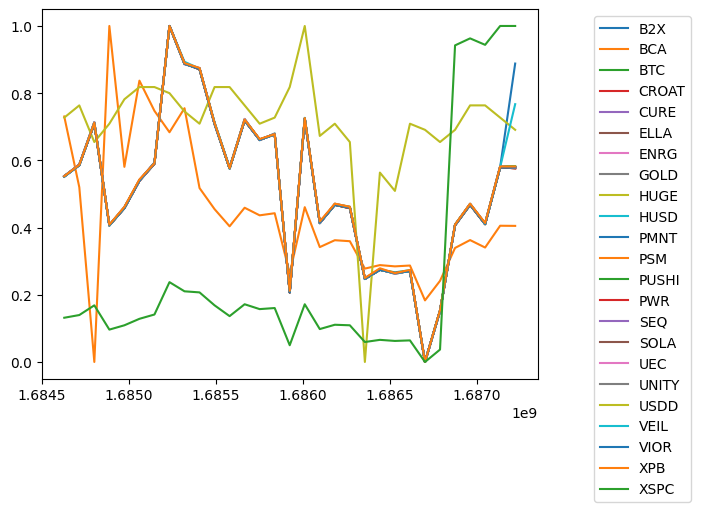

In [20]:
time_type = 'month'
for coin in coins_with_BTC:
    curr_columns = [col for col in df.columns if time_type in col]
    curr_df = df[df.index==coin][curr_columns].rename(columns={col: int(col.split('_')[1]) for col in curr_columns})
    curr_df = curr_df.T.reset_index()

    plt.plot(curr_df['index'], curr_df[coin], label=coin)
    plt.legend(bbox_to_anchor=(1.1, 1))

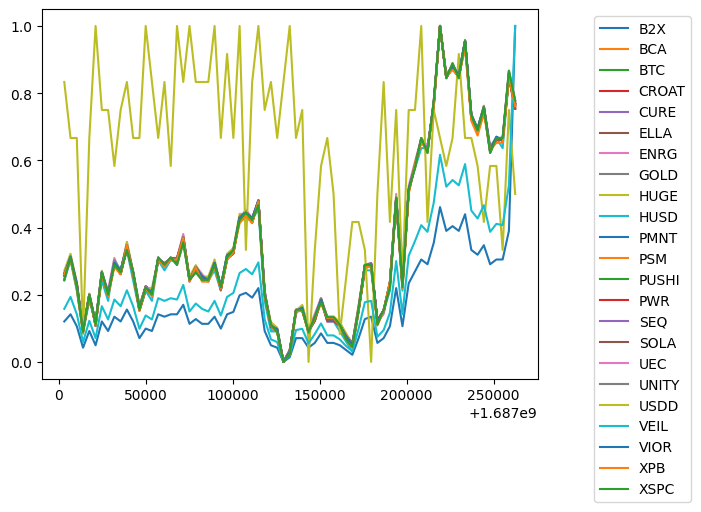

In [21]:
time_type = 'days'
for coin in coins_with_BTC:
    curr_columns = [col for col in df.columns if time_type in col]
    curr_df = df[df.index==coin][curr_columns].rename(columns={col: int(col.split('_')[1]) for col in curr_columns})
    curr_df = curr_df.T.reset_index()

    plt.plot(curr_df['index'], curr_df[coin], label=coin)
    plt.legend(bbox_to_anchor=(1.1, 1))

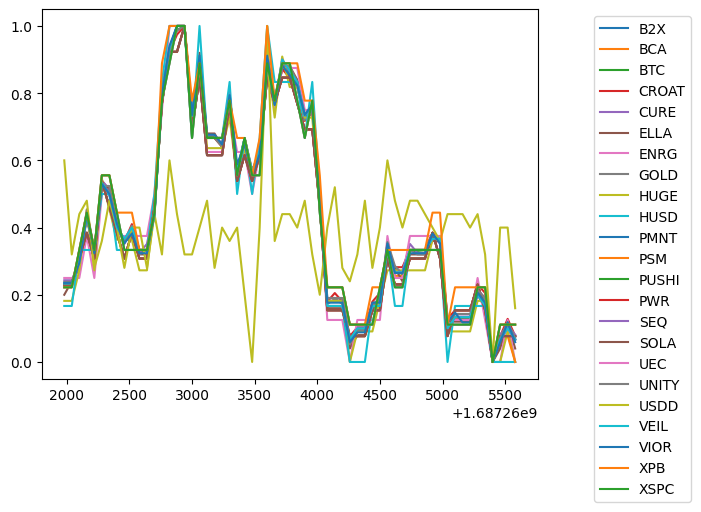

In [22]:
time_type = 'hour'
for coin in coins_with_BTC:
    curr_columns = [col for col in df.columns if time_type in col]
    curr_df = df[df.index==coin][curr_columns].rename(columns={col: int(col.split('_')[1]) for col in curr_columns})
    curr_df = curr_df.T.reset_index()

    plt.plot(curr_df['index'], curr_df[coin], label=coin)
    plt.legend(bbox_to_anchor=(1.1, 1))

1) It can be seen that there are many invisible coins (B2X, USD, etc.) because they are "behind" others. It's right that we got into the same cluster
2) In my opinion, the clustering turned out to be quite accurate.

## tsfel

In [5]:
cfg_file = tsfel.get_features_by_domain()
## dataframe prepairing to tsfresh
df_for_tsfel = pd.DataFrame()
for coin in used_coin_list:
    curr_month_df = df[df.index==coin][[col for col in df.columns if 'month' in col]].T.reset_index()
    curr_days_df = df[df.index==coin][[col for col in df.columns if 'days' in col]].T.reset_index()
    curr_hour_df = df[df.index==coin][[col for col in df.columns if 'hour' in col]].T.reset_index()
    
    curr_month_df['time'] = curr_month_df['index'].apply(lambda x: int(x.split('_')[1]))
    curr_days_df['time'] = curr_days_df['index'].apply(lambda x: int(x.split('_')[1]))
    curr_hour_df['time'] = curr_hour_df['index'].apply(lambda x: int(x.split('_')[1]))
    
    curr_month_df.sort_values(by='time', inplace=True)
    curr_days_df.sort_values(by='time', inplace=True)
    curr_hour_df.sort_values(by='time', inplace=True)
    
    curr_tsfel_month = tsfel.time_series_features_extractor(cfg_file, curr_month_df[coin], verbose=0)
    curr_tsfel_days = tsfel.time_series_features_extractor(cfg_file, curr_days_df[coin], verbose=0)
    curr_tsfel_hour = tsfel.time_series_features_extractor(cfg_file, curr_hour_df[coin], verbose=0)
    
    curr_tsfel_month = curr_tsfel_month.rename(columns={col: f'month_{col}' for col in curr_tsfel_month.columns})
    curr_tsfel_days = curr_tsfel_days.rename(columns={col: f'days_{col}' for col in curr_tsfel_days.columns})
    curr_tsfel_hour = curr_tsfel_hour.rename(columns={col: f'hour_{col}' for col in curr_tsfel_hour.columns})
    
    curr_df = pd.concat([curr_tsfel_month, curr_tsfel_days, curr_tsfel_hour], axis=1)
    curr_df['coin'] = coin
    
    df_for_tsfel = pd.concat([df_for_tsfel, curr_df], axis=0)
    
del curr_month_df, curr_days_df, curr_hour_df, curr_tsfel_month, curr_tsfel_days, curr_tsfel_hour
df_for_tsfel = df_for_tsfel.set_index('coin')

/tmp/ipykernel_5871/1515187924.py:18: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_month = tsfel.time_series_features_extractor(cfg_file, curr_month_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_extractor(cfg_file, curr_days_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:20: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_hour = tsfel.time_series_features_extractor(cfg_file, curr_hour_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:18: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_month = tsfel.time_series_features_extractor(cfg_file, curr_month_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_ex

/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_extractor(cfg_file, curr_days_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:20: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_hour = tsfel.time_series_features_extractor(cfg_file, curr_hour_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:18: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_month = tsfel.time_series_features_extractor(cfg_file, curr_month_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_extractor(cfg_file, curr_days_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:20: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_hour = tsfel.time_series_features_extr

/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_extractor(cfg_file, curr_days_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:20: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_hour = tsfel.time_series_features_extractor(cfg_file, curr_hour_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:18: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_month = tsfel.time_series_features_extractor(cfg_file, curr_month_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_extractor(cfg_file, curr_days_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:20: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_hour = tsfel.time_series_features_extr

/tmp/ipykernel_5871/1515187924.py:18: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_month = tsfel.time_series_features_extractor(cfg_file, curr_month_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_extractor(cfg_file, curr_days_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:20: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_hour = tsfel.time_series_features_extractor(cfg_file, curr_hour_df[coin], verbose=0)
/home/zendro/DS_Roadmap/Otus/ML. Advanced/for_git/TimeSeries/.venv/lib/python3.8/site-packages/tsfel/feature_extraction/features.py:520: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return scipy.stats.kurtosis(signal)
/home/zendro/DS_Roadmap/O

/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_extractor(cfg_file, curr_days_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:20: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_hour = tsfel.time_series_features_extractor(cfg_file, curr_hour_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:18: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_month = tsfel.time_series_features_extractor(cfg_file, curr_month_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_extractor(cfg_file, curr_days_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:20: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_hour = tsfel.time_series_features_extr

/home/zendro/DS_Roadmap/Otus/ML. Advanced/for_git/TimeSeries/.venv/lib/python3.8/site-packages/tsfel/feature_extraction/features.py:520: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return scipy.stats.kurtosis(signal)
/home/zendro/DS_Roadmap/Otus/ML. Advanced/for_git/TimeSeries/.venv/lib/python3.8/site-packages/tsfel/feature_extraction/features.py:540: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return scipy.stats.skew(signal)
/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_extractor(cfg_file, curr_days_df[coin], verbose=0)
/home/zendro/DS_Roadmap/Otus/ML. Advanced/for_git/TimeSeries/.venv/lib/python3.8/site-packages/tsfel/fe

/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_extractor(cfg_file, curr_days_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:20: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_hour = tsfel.time_series_features_extractor(cfg_file, curr_hour_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:18: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_month = tsfel.time_series_features_extractor(cfg_file, curr_month_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_extractor(cfg_file, curr_days_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:20: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_hour = tsfel.time_series_features_extr

/home/zendro/DS_Roadmap/Otus/ML. Advanced/for_git/TimeSeries/.venv/lib/python3.8/site-packages/tsfel/feature_extraction/features.py:520: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return scipy.stats.kurtosis(signal)
/home/zendro/DS_Roadmap/Otus/ML. Advanced/for_git/TimeSeries/.venv/lib/python3.8/site-packages/tsfel/feature_extraction/features.py:540: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return scipy.stats.skew(signal)
/tmp/ipykernel_5871/1515187924.py:18: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_month = tsfel.time_series_features_extractor(cfg_file, curr_month_df[coin], verbose=0)
/home/zendro/DS_Roadmap/Otus/ML. Advanced/for_git/TimeSeries/.venv/lib/python3.8/site-packages/tsfel/

/tmp/ipykernel_5871/1515187924.py:18: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_month = tsfel.time_series_features_extractor(cfg_file, curr_month_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_extractor(cfg_file, curr_days_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:20: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_hour = tsfel.time_series_features_extractor(cfg_file, curr_hour_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:18: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_month = tsfel.time_series_features_extractor(cfg_file, curr_month_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_ex

/tmp/ipykernel_5871/1515187924.py:20: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_hour = tsfel.time_series_features_extractor(cfg_file, curr_hour_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:18: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_month = tsfel.time_series_features_extractor(cfg_file, curr_month_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:19: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_days = tsfel.time_series_features_extractor(cfg_file, curr_days_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:20: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_hour = tsfel.time_series_features_extractor(cfg_file, curr_hour_df[coin], verbose=0)
/tmp/ipykernel_5871/1515187924.py:18: UserWarning: Using default sampling frequency set in configuration file.
  curr_tsfel_month = tsfel.time_series_features_ext

In [6]:
df_for_tsfel.fillna(0, inplace=True)

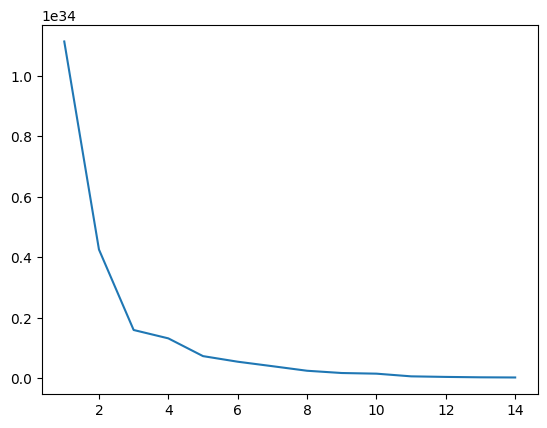

In [7]:
x, y = [], []
for i in range(1, 15):
    x.append(i)
    clusterer = cluster.KMeans(n_clusters=i, n_init='auto')
    clusterer.fit(df_for_tsfel)
    y.append(clusterer.inertia_)
    
plt.plot(x, y)

In [10]:
clusterer = cluster.KMeans(n_clusters=6, n_init='auto')
labels = pd.Series(clusterer.fit_predict(df_for_tsfel))
labels.index = df_for_tsfel.index
labels

coin
UENC    0
PSM     0
CFG     0
BAX     0
CDN     0
       ..
GEOJ    0
EBET    0
MLN     0
CRSP    3
BTC     0
Length: 101, dtype: int32

In [11]:
labels.value_counts()

0    80
1     7
3     5
4     5
2     3
5     1
Name: count, dtype: int64

#### It looks really bad

In [16]:
# DBSCAN
clusterer = cluster.DBSCAN(min_samples=5, eps=0.7)
labels = pd.Series(clusterer.fit_predict(df_for_tsfel))
labels.index = df_for_tsfel.index
labels

coin
UENC   -1
PSM    -1
CFG    -1
BAX    -1
CDN    -1
       ..
GEOJ   -1
EBET   -1
MLN    -1
CRSP   -1
BTC    -1
Length: 101, dtype: int64

In [17]:
labels.value_counts()  # to be honest, didn't have time to deal with it

-1    101
Name: count, dtype: int64

## tslearn.clustering

In [149]:
# transform for tslearn.clistering
curr_month_df = df[df.index=='BTC'][[col for col in df.columns if 'month' in col]]
curr_days_df = df[df.index=='BTC'][[col for col in df.columns if 'days' in col]]
curr_hour_df = df[df.index=='BTC'][[col for col in df.columns if 'hour' in col]]

month_coin_array = np.empty(shape=(len(used_coin_list), curr_month_df.shape[1]))
days_coin_array = np.empty(shape=(len(used_coin_list), curr_days_df.shape[1]))
hour_coin_array = np.empty(shape=(len(used_coin_list), curr_hour_df.shape[1]))

for idx, coin in enumerate(used_coin_list):
    curr_month_df = df[df.index==coin][[col for col in df.columns if 'month' in col]]
    curr_days_df = df[df.index==coin][[col for col in df.columns if 'days' in col]]
    curr_hour_df = df[df.index==coin][[col for col in df.columns if 'hour' in col]]

    month_coin_array[idx] = curr_month_df.T[coin].to_numpy()
    days_coin_array[idx] = curr_days_df.T[coin].to_numpy()
    hour_coin_array[idx] = curr_hour_df.T[coin].to_numpy()

In [150]:
# i didn't come up with how i can join month, days and hour here

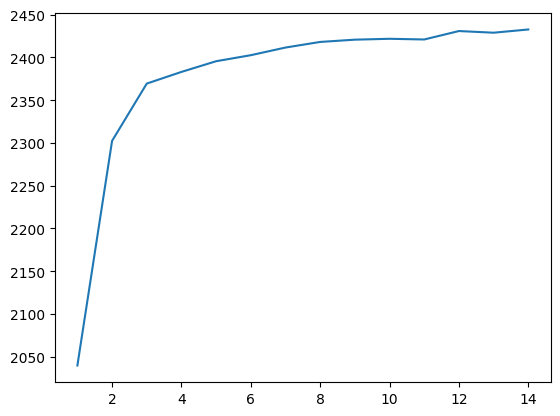

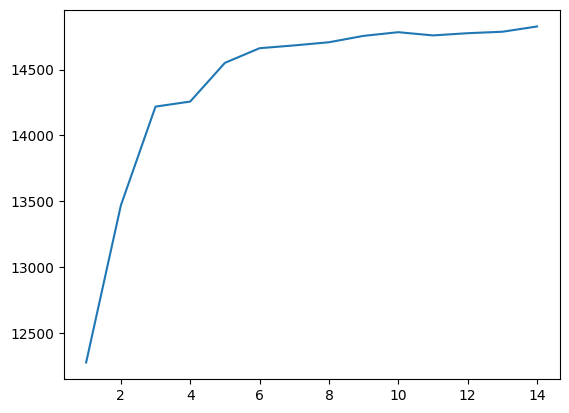

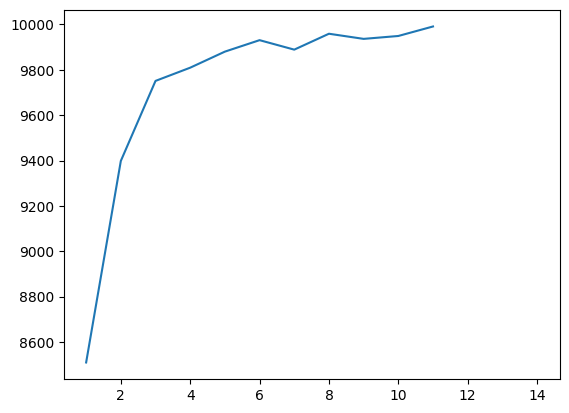

In [151]:
x, y = [], []
for i in range(1, 15):
    x.append(i)
    ts_kmeans = TimeSeriesKMeans(n_clusters=i, metric="softdtw", n_jobs=4, max_iter=20)
    labels = ts_kmeans.fit_predict(month_coin_array)
    y.append(ts_kmeans.inertia_)
    
plt.plot(x, y)
plt.show()

x, y = [], []
for i in range(1, 15):
    x.append(i)
    ts_kmeans = TimeSeriesKMeans(n_clusters=i, metric="softdtw", n_jobs=4, max_iter=20)
    labels = ts_kmeans.fit_predict(days_coin_array)
    y.append(ts_kmeans.inertia_)
    
plt.plot(x, y)
plt.show()

x, y = [], []
for i in range(1, 15):
    x.append(i)
    ts_kmeans = TimeSeriesKMeans(n_clusters=i, metric="softdtw", n_jobs=4, max_iter=20)
    labels = ts_kmeans.fit_predict(hour_coin_array)
    y.append(ts_kmeans.inertia_)
    
plt.plot(x, y)
plt.show()

In [152]:
# I don't understand why inernia is increasing

In [153]:
ts_kmeans = TimeSeriesKMeans(n_clusters=2, metric="softdtw", n_jobs=4, max_iter=20)
labels_month = ts_kmeans.fit_predict(month_coin_array)
    
ts_kmeans = TimeSeriesKMeans(n_clusters=2, metric="softdtw", n_jobs=4, max_iter=20)
labels_days = ts_kmeans.fit_predict(days_coin_array)

ts_kmeans = TimeSeriesKMeans(n_clusters=2, metric="softdtw", n_jobs=4, max_iter=20)
labels_hour = ts_kmeans.fit_predict(hour_coin_array)

In [154]:
tslearn_result = pd.DataFrame(list(zip(used_coin_list, labels_month, labels_days, labels_hour)),
                              columns=['coin', 'month_label', 'days_label', 'hour_label'])
tslearn_result

,coin,month_label,days_label,hour_label
0,UENC,1,0,0
1,PSM,0,0,1
2,CFG,0,0,1
3,BAX,0,1,0
4,CDN,1,0,0
...,...,...,...,...
96,GEOJ,0,1,1
97,EBET,1,0,1
98,MLN,0,1,1
99,CRSP,0,1,0


In [155]:
BTC_labels = list(tslearn_result[tslearn_result['coin'] == 'BTC'].values[0])[1:]

tslearn_result['BTC_like'] = tslearn_result.apply(lambda x: 1 if (x['month_label'] == BTC_labels[0]) & 
                                                                 (x['days_label'] == BTC_labels[1]) & 
                                                                 (x['hour_label'] == BTC_labels[2])
                                                  else 0, axis=1)

tslearn_result['absolutely_not_BTC'] = tslearn_result.apply(lambda x: 1 if (x['month_label'] != BTC_labels[0]) & 
                                                                           (x['days_label'] != BTC_labels[1]) & 
                                                                           (x['hour_label'] != BTC_labels[2])
                                                            else 0, axis=1)

coins_with_BTC = list(tslearn_result[tslearn_result['BTC_like'] == 1]['coin'])
coins_not_BTC = list(tslearn_result[tslearn_result['absolutely_not_BTC'] == 1]['coin'])
print(len(coins_with_BTC), len(coins_not_BTC))

33 2


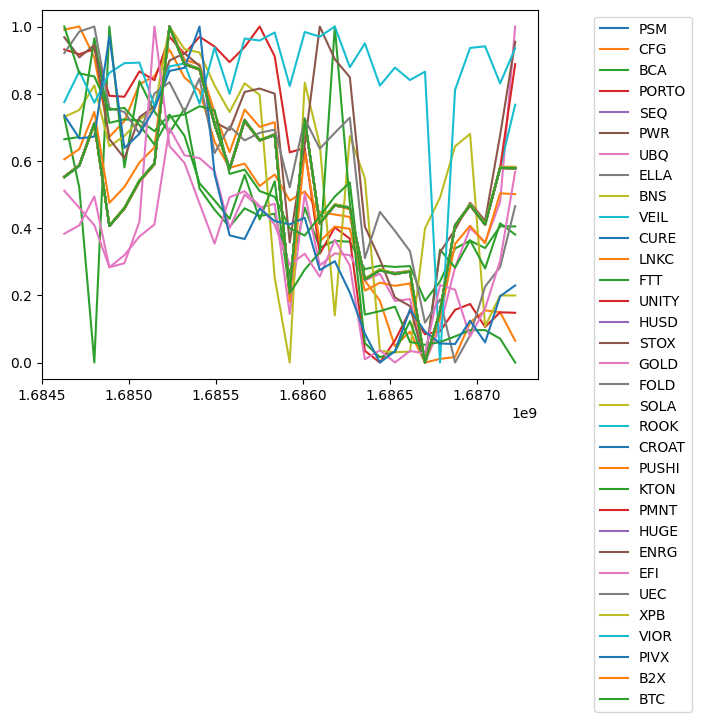

In [156]:
time_type = 'month'
for coin in coins_with_BTC:
    curr_columns = [col for col in df.columns if time_type in col]
    curr_df = df[df.index==coin][curr_columns].rename(columns={col: int(col.split('_')[1]) for col in curr_columns})
    curr_df = curr_df.T.reset_index()

    plt.plot(curr_df['index'], curr_df[coin], label=coin)
    plt.legend(bbox_to_anchor=(1.1, 1))

In [ ]:
## it's difficult to recognize here something interesting

## wavelet

In [5]:
wavelet_type = 'db1'

df_with_wavelets = pd.DataFrame()
for coin in used_coin_list:
    curr_month_df = df[df.index==coin][[col for col in df.columns if 'month' in col]].T.reset_index()
    curr_days_df = df[df.index==coin][[col for col in df.columns if 'days' in col]].T.reset_index()
    curr_hour_df = df[df.index==coin][[col for col in df.columns if 'hour' in col]].T.reset_index()
    
    curr_month_df['time'] = curr_month_df['index'].apply(lambda x: int(x.split('_')[1]))
    curr_days_df['time'] = curr_days_df['index'].apply(lambda x: int(x.split('_')[1]))
    curr_hour_df['time'] = curr_hour_df['index'].apply(lambda x: int(x.split('_')[1]))
    
    curr_month_df.sort_values(by='time', inplace=True)
    curr_days_df.sort_values(by='time', inplace=True)
    curr_hour_df.sort_values(by='time', inplace=True)
    
    curr_wavelet_month = pywt.dwt(curr_month_df[coin], wavelet_type)
    curr_wavelet_days = pywt.dwt(curr_days_df[coin], wavelet_type)
    curr_wavelet_hour = pywt.dwt(curr_hour_df[coin], wavelet_type)
    
    curr_wavelet_month_amplitudes = pd.DataFrame(curr_wavelet_month[0]).T
    curr_wavelet_month_frequencies = pd.DataFrame(curr_wavelet_month[1]).T
    curr_wavelet_days_amplitudes = pd.DataFrame(curr_wavelet_days[0]).T
    curr_wavelet_days_frequencies = pd.DataFrame(curr_wavelet_days[1]).T
    curr_wavelet_hour_amplitudes = pd.DataFrame(curr_wavelet_hour[0]).T
    curr_wavelet_hour_frequencies = pd.DataFrame(curr_wavelet_hour[1]).T
    
    curr_wavelet_month_amplitudes.rename(columns={col: f'month_amp_{col}' for col in curr_wavelet_month_amplitudes.columns}, inplace=1)
    curr_wavelet_month_frequencies.rename(columns={col: f'month_freq_{col}' for col in curr_wavelet_month_frequencies.columns}, inplace=1)
    curr_wavelet_days_amplitudes.rename(columns={col: f'days_amp_{col}' for col in curr_wavelet_days_amplitudes.columns}, inplace=1)
    curr_wavelet_days_frequencies.rename(columns={col: f'days_freq_{col}' for col in curr_wavelet_days_frequencies.columns}, inplace=1)
    curr_wavelet_hour_amplitudes.rename(columns={col: f'hour_amp_{col}' for col in curr_wavelet_hour_amplitudes.columns}, inplace=1)
    curr_wavelet_hour_frequencies.rename(columns={col: f'hour_freq_{col}' for col in curr_wavelet_hour_frequencies.columns}, inplace=1)
    
    
    
    curr_df = pd.concat([curr_wavelet_month_amplitudes, curr_wavelet_month_frequencies,
                         curr_wavelet_days_amplitudes, curr_wavelet_days_frequencies,
                         curr_wavelet_hour_amplitudes, curr_wavelet_hour_frequencies], axis=1)
    curr_df['coin'] = coin
    
    df_with_wavelets = pd.concat([df_with_wavelets, curr_df], axis=0)
    
df_with_wavelets = df_with_wavelets.set_index('coin').fillna(0)
df_with_wavelets

,month_amp_0,month_amp_1,month_amp_2,month_amp_3,month_amp_4,month_amp_5,month_amp_6,month_amp_7,month_amp_8,month_amp_9,...,hour_freq_21,hour_freq_22,hour_freq_23,hour_freq_24,hour_freq_25,hour_freq_26,hour_freq_27,hour_freq_28,hour_freq_29,hour_freq_30
coin,,,,,,,,,,,,,,,,,,,,,
UENC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
PSM,0.805383,0.788604,0.704710,1.124180,1.244029,0.908452,0.975568,0.625610,0.802986,0.654373,...,-0.108786,0.000000,0.000000,-0.054393,0.163178,0.000000,-0.054393,0.108786,0.000000,0.0
CFG,1.407832,1.116820,1.093846,1.261050,1.171704,0.874311,0.790071,0.736463,0.676474,0.617761,...,-0.353553,0.000000,-0.339411,0.000000,0.000000,0.424264,-0.282843,-0.127279,0.113137,0.0
BAX,0.062591,0.156900,0.068089,0.041022,0.309994,0.435175,0.795072,1.042052,1.291569,1.264080,...,-0.606320,-0.017598,0.000000,-0.001600,0.004799,0.000000,0.625518,0.003200,0.000000,0.0
CDN,0.113737,0.111640,0.099702,0.158909,0.175849,0.128418,0.137937,0.088570,0.113576,0.092764,...,-0.000703,0.000000,0.000000,-0.000176,0.001229,0.000176,-0.000527,0.000878,-0.000176,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GEOJ,1.370007,1.355272,1.252123,1.173534,1.095927,0.915172,0.893560,0.788348,0.705339,0.706616,...,-0.006399,0.003200,-0.655914,0.000000,0.006399,0.003200,-0.009599,0.009599,-0.003200,0.0
EBET,0.241187,0.264370,0.249413,0.328313,0.368698,0.325321,0.373185,0.299894,0.312234,0.288302,...,-0.064282,0.064282,-0.064282,0.000000,0.000000,0.064282,-0.128565,0.128565,0.000000,0.0
MLN,1.295782,1.301007,1.252241,1.368931,1.339323,1.229599,1.353256,1.126843,0.917846,0.881271,...,-0.005015,-0.672002,-0.702092,0.687047,0.000000,-0.050149,0.576718,0.005015,0.596778,0.0


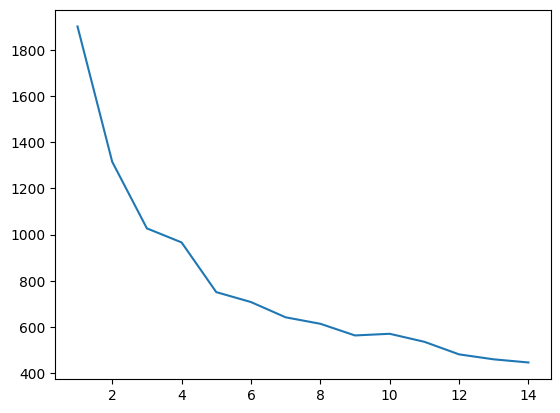

In [6]:
x, y = [], []
for i in range(1, 15):
    x.append(i)
    clusterer = cluster.KMeans(n_clusters=i, n_init='auto')
    clusterer.fit(df_with_wavelets)
    y.append(clusterer.inertia_)
    
plt.plot(x, y)

In [10]:
clusterer = cluster.KMeans(n_clusters=11, n_init='auto')
labels = pd.Series(clusterer.fit_predict(df_with_wavelets))
labels.index = df_with_wavelets.index
labels

coin
UENC     2
PSM      1
CFG      3
BAX      3
CDN      2
        ..
GEOJ    10
EBET     5
MLN      6
CRSP     4
BTC      1
Length: 101, dtype: int32

In [11]:
BTC_label = labels[labels.index == 'BTC']['BTC']
coins_with_BTC = sorted(list(labels[labels == BTC_label].index))

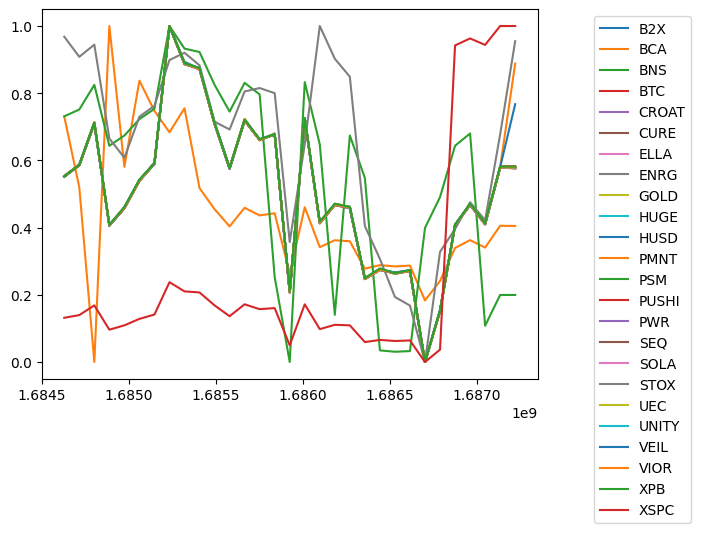

In [12]:
time_type = 'month'
for coin in coins_with_BTC:
    curr_columns = [col for col in df.columns if time_type in col]
    curr_df = df[df.index==coin][curr_columns].rename(columns={col: int(col.split('_')[1]) for col in curr_columns})
    curr_df = curr_df.T.reset_index()

    plt.plot(curr_df['index'], curr_df[coin], label=coin)
    plt.legend(bbox_to_anchor=(1.1, 1))

#### It looks like tsfresh!

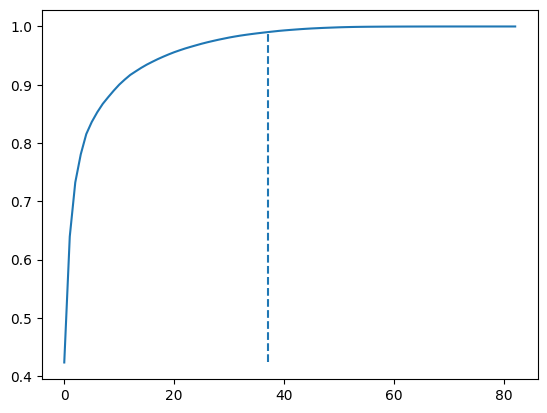

In [24]:
pca_instance = decomposition.PCA(n_components=i)
pca_instance.fit(df_with_wavelets)

explained_variance = np.cumsum(pca_instance.explained_variance_ratio_)
plt.plot(explained_variance)
components_threshold = np.argwhere(explained_variance > 0.99).reshape(-1)[0]
plt.vlines(components_threshold, explained_variance.min(), 0.99, linestyle='dashed')
plt.show()

In [25]:
pca_instance = decomposition.PCA(n_components=components_threshold)
df_with_wavelets_pca_pruned = pca_instance.fit_transform(df_with_wavelets)

In [27]:
clusterer = cluster.KMeans(n_clusters=11, n_init='auto')
labels = pd.Series(clusterer.fit_predict(df_with_wavelets_pca_pruned))
labels.index = df_with_wavelets.index
labels

coin
UENC    4
PSM     1
CFG     5
BAX     5
CDN     4
       ..
GEOJ    6
EBET    2
MLN     7
CRSP    3
BTC     1
Length: 101, dtype: int32

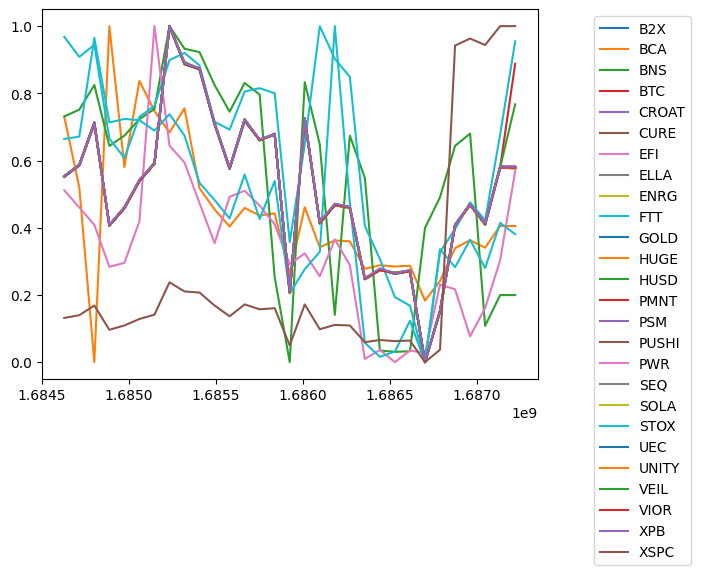

In [28]:
BTC_label = labels[labels.index == 'BTC']['BTC']
coins_with_BTC = sorted(list(labels[labels == BTC_label].index))

time_type = 'month'
for coin in coins_with_BTC:
    curr_columns = [col for col in df.columns if time_type in col]
    curr_df = df[df.index==coin][curr_columns].rename(columns={col: int(col.split('_')[1]) for col in curr_columns})
    curr_df = curr_df.T.reset_index()

    plt.plot(curr_df['index'], curr_df[coin], label=coin)
    plt.legend(bbox_to_anchor=(1.1, 1))

In [30]:
BTC_label = labels[labels.index == 'BTC']['BTC']
result = sorted(list(labels[labels != BTC_label].index))
result

['AAVE',
 'ARI',
 'ARPAC',
 'ATLAS',
 'BAX',
 'BBCC',
 'BEZ',
 'CBC',
 'CDN',
 'CFG',
 'CHR',
 'CNRG',
 'CONI',
 'CRAB',
 'CREED',
 'CRSP',
 'DG',
 'DREP',
 'DTH',
 'EBET',
 'EBTC',
 'ECO',
 'ELF',
 'ESD',
 'F2K',
 'FOLD',
 'FUN',
 'GBYTE',
 'GEOJ',
 'GIFT',
 'GML',
 'IVZ',
 'JIF',
 'KISC',
 'KTON',
 'LKK',
 'LNKC',
 'MLN',
 'MNDE',
 'MNZ',
 'PIVX',
 'PORTO',
 'PRQ',
 'QKC',
 'QTUM',
 'RAI',
 'RBTC',
 'RBY',
 'ROOK',
 'ROYAL',
 'SAITAMA',
 'SBSC',
 'SNB',
 'SOLO',
 'SPEC',
 'SPRTZ',
 'SSC',
 'STALIN',
 'STP',
 'TBCX',
 'TODAY',
 'TVK',
 'UBQ',
 'UENC',
 'UFC',
 'USDD',
 'UTNP',
 'VIB',
 'VID',
 'WICC',
 'WRC',
 'XPD',
 'ZCC1',
 'ZENI',
 'ZYN']